The goal of this project is to analysing the Boston dataset using the CRISP-DM methods, we will try to answer some questions 
The method to follow is <br>
1 - Business understanding <br>
2 - Data understanding <br>
3 - Data preparation <br>
4 - Modeling <br>
5 - Evaluation <br>
6 - Processing <br>

## A look at the data

 Import all necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

Read all the dataset we've export
## A look at the data

 Read all the data with right separator and pandas.

In [2]:
calendar = pd.read_csv('calendar.csv', sep=',')
listings = pd.read_csv('listings.csv', sep=',')
reviews = pd.read_csv('reviews.csv', sep=',')

## I - Listings dataset analysis
**1.** Let's analyse listings dataset to see columns and values

In [3]:
#get a look to the listing data
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


**3.** get a look on dataframe number of columns and rows 
we will use this quite a lot so let's create a function

In [4]:
len(list(set(listings['id'])))

3585

In [5]:
def get_dataframe_info(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    printing the numbers of row
    and columns of the dataframe

    '''
    print('number of rows of dataframe: {} \n'.format(dataframe.shape[0]))
    print('number of columns of  dataframe: {} \n'.format(dataframe.shape[1]))

In [6]:
get_dataframe_info(listings)

number of rows of dataframe: 3585 

number of columns of  dataframe: 95 



**4.** get a look to categorical and numerical columns
create a function for that also

In [7]:
def get_dataframe_categorie(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    printing the numbers of
    categorical and numerical
    variables

    '''
    numerical_dataframe = dataframe.select_dtypes(include=['number'])
    categorical_dataframe = dataframe.select_dtypes(exclude=['number'])
    print('number of numerical columns: {} \n'.format(numerical_dataframe.shape[1]))
    print('number of categorical columns: {} \n'.format(categorical_dataframe.shape[1]))

In [8]:
get_dataframe_categorie(listings)

number of numerical columns: 33 

number of categorical columns: 62 



**5.** get infos about missing values
we will use this quite a lot so let's create a function

In [9]:
def get_info_missing_values(dataframe):
    '''
    INPUT
    dataframe - pandas dataframe 
    
    OUTPUT
    print the missing values ratio
    for each column of the dataframe

    '''
    print(dataframe.isnull().mean().sort_values(ascending=False))

**6.** get columns with a certain percetange of missing values

In [10]:
get_info_missing_values(listings)

neighbourhood_group_cleansed        1.000000
jurisdiction_names                  1.000000
license                             1.000000
has_availability                    1.000000
square_feet                         0.984379
monthly_price                       0.752301
weekly_price                        0.751185
security_deposit                    0.625662
notes                               0.550907
interaction                         0.433473
access                              0.415342
neighborhood_overview               0.394700
host_about                          0.365132
transit                             0.359833
house_rules                         0.332497
cleaning_fee                        0.308787
space                               0.294840
review_scores_accuracy              0.229568
review_scores_location              0.229289
review_scores_value                 0.229010
review_scores_checkin               0.228731
review_scores_cleanliness           0.228173
review_sco

In [11]:
#get columns with entire missing values
missing_columns = listings.columns[listings.isnull().mean()==1]
print('colums with no values \n {} '.format(missing_columns))

colums with no values 
 Index(['neighbourhood_group_cleansed', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object') 


In [12]:
# get a look at these columns data

listings_data = listings[missing_columns]
listings_data.head()

,neighbourhood_group_cleansed,has_availability,license,jurisdiction_names
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


We got no data at all for these columns so are they relevants no, they dont give many informations
in the dataset, we can delete them

In [13]:
#delete theses columns
listings = listings.drop(list(missing_columns), axis=1)

In [15]:
# get the columns with no missing values
clean_columns = listings.columns[listings.isnull().mean()==0]
print('columns with no missings \n {} '.format(clean_columns))

columns with no missings 
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood_cleansed', 'state', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_pho

In [16]:
# get the numeric variables from listing dataset
num_vars = listings.select_dtypes(include=['number'])
print('numbers of numerical variables are {} \n'.format(len(num_vars.columns)))

# get the categorical variables from dataset
cat_vars = listings.select_dtypes(exclude=['number'])
print('numbers of categorical variables are {} \n'.format(len(cat_vars.columns)))

numbers of numerical variables are 29 

numbers of categorical variables are 62 



Let's have a view on the experience offered repartition

In [17]:
# print all columns from the dataset
print(listings.columns,'\n')

#get the number of missing values in  property type
print('mean of listings missing {} \n'.format(listings['property_type'].isnull().mean()))


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
      

we can see that only few values is missing so got always enter the type of the house
Let's get a look on listings type repartition

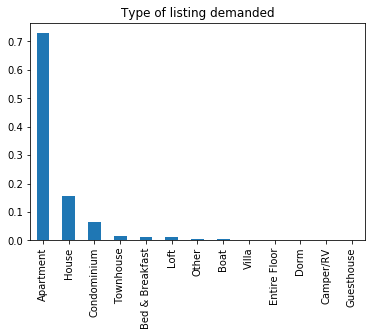

In [18]:
# get the number of property type missing in the dataset
property_type = listings['property_type'].value_counts()
(property_type/listings.shape[0]).plot(kind='bar');
plt.title('Type of listing demanded');

We can see that the most demanded type of listings is Appartment, people like to book most of the time appartmets (70%), houses come in second 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c76cb4c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c6c1c5dd8>]], dtype=object)

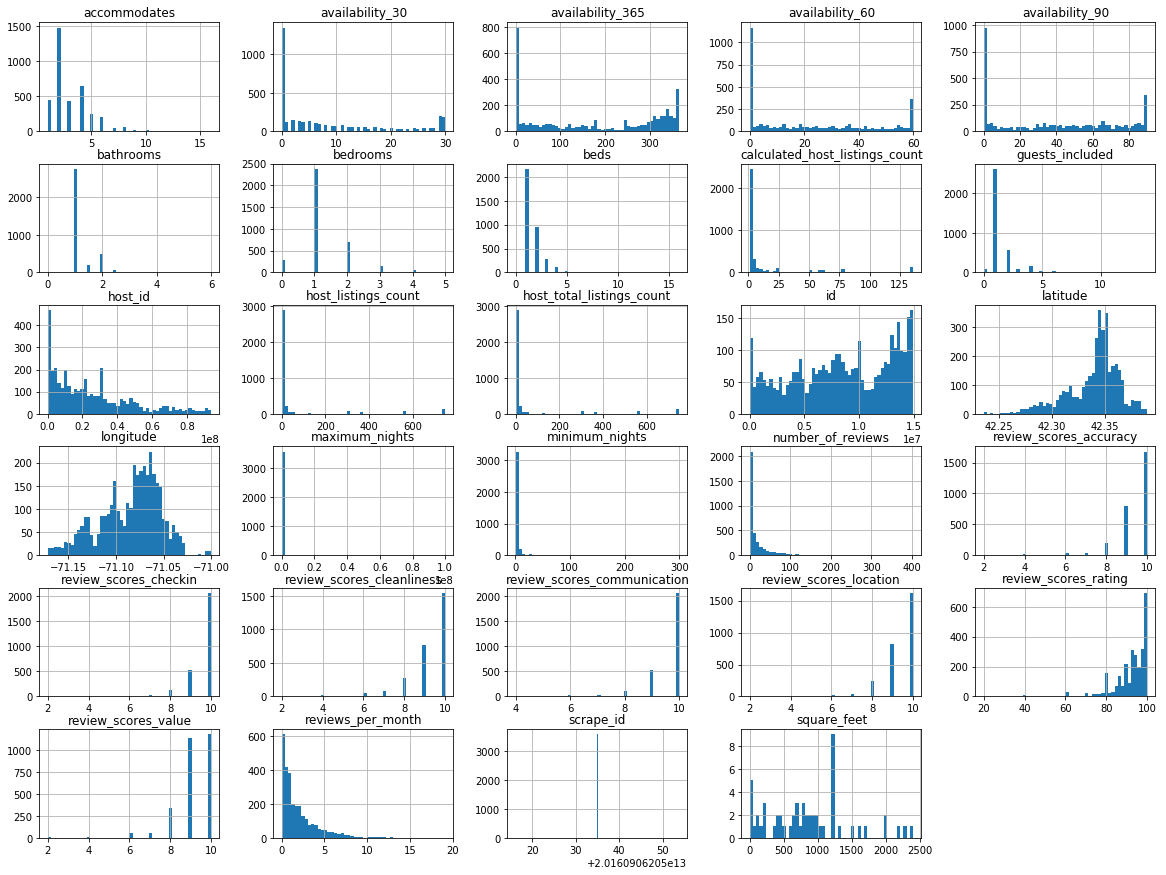

In [19]:
# plot histogram for all the numeric values of listings
listings.hist(bins=50,figsize=((20,15)))

when analysing the hist from numerical variables, we can see that many things
- many of houses has 2 accomodates (kind of appartments)
- most of the listings have one bedroom
- 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c6c10b320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c693bb748>]], dtype=object)

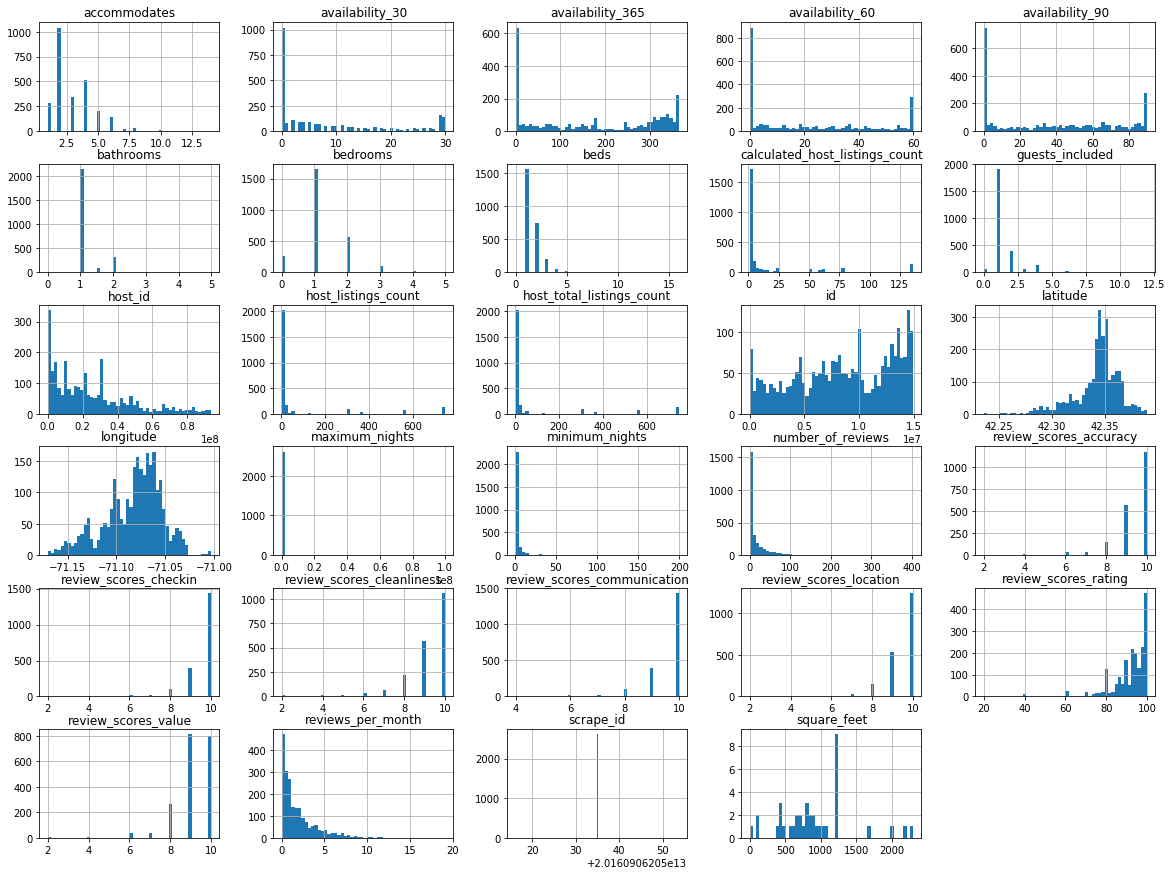

In [20]:
# Let's analyse specifically the appartment dataset
listings_appartments = listings[listings['property_type']=='Apartment']
listings_appartments.hist(bins=50, figsize=(20,15))

** We can notice that all the appartment got 2 pieces (most demanded house) **

## II - Reviews dataset analysis
**1.** Let's analyse reviews dataset to see columns and values

In [9]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


**2.** adding month to reviews

In [88]:
import datetime
def adding_month(value):
    """ adding the month
    to the dataframe
    """
    months = ['Jan', 'Fev',
              'Mar','Apr',
              'May', 'Jun',
             'Jul', 'Aug',
              'Sep','Oct', 
              'Nov', 'Dec']
    value_converted = datetime.datetime.strptime(value, '%Y-%m-%d')
    return months[value_converted.month-1]

reviews['months'] = reviews['date'].apply(adding_month)

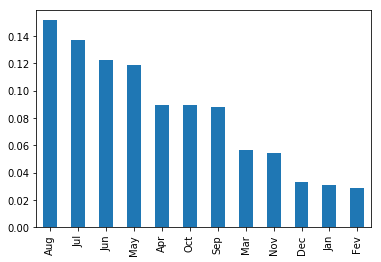

In [89]:
(reviews['months'].value_counts()/reviews.shape[0]).plot(kind = 'bar')

We noticed that people use to book the houses in the summer (month of Aug, July, June, May), few people booked in Dec, Janv, Fev because of the coolness perhaps